# Milestone I Natural Language Processing

<h3 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Task 2&3.<br>Feature Representation & Classification</strong></h3>

Date: "October 2, 2022"

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used (please go to `requirements.txt` file for further details)
* sklearn
* collections
* re
* numpy
* nltk
* itertools
* pandas
* os
* pylab
* collections

## Introduction

Machine and Algorithm can not understand lossing categorical data. Therefore, we should encode those text into numerical values using feature representation
We have pre-processed data in Task1. Once the text data is cleaned and tokenized it is ready for NLP analysis. Vectorization of the tokens allows us to mathematically represent text as vectors. There are numerous ways to create these vectors.

+ Compare between ML models with different feature representation (count vector, weigthed and unweighted embedding models)

+ Single model (e.g., logistic regression with count vector representation), and compare the performance with different amount of info. 

+ Unweighted, we just sum the word embeddings of an job ad as the representation of an job ad. 

+ Weighted sum, ou can do a weighted sum of word embeddings as representation instead of just sum.


### Multi-class classification 
+ Model: we will use Linear Model (Logistic Regression) combine with different attributes and feature representations. 
+ Model evaluation:K-fold cross-validation (5 folds here) to avoid overfitting the data
+ Metric: we will chose Accuracy to compare our models
> * `accuracy = correct_predictions / total_predictions`

## Steps
+ 2.1. Examining and loading data

+ 1.2. Basic Text Pre-processing
    * Feature Representation: Binary, Count, TF-IDF
    * Classification with Feature Representation
    * FastText embedding model with unweighted and weighted vector
    * Comparision
    
+ 1.3. Summary
> * Discussion
      
+ 1.4. References


## Dataset
+ A small collection of job advertisement documents (around 776 jobs) inside the `data` folder.
+ Inside the data folder, there are four different sub-folders: Accounting_Finance, Engineering, Healthcare_Nursing, and Sales, representing a job category.
+ The job advertisement text documents of a particular category are in the corresponding sub-folder.
+ Each job advertisement document is a txt file named `Job_<ID>.txt`. It contains the title, the webindex (some will also have information on the company name, some might not), and the full description of the job advertisement.

## Importing libraries & packages

Install packages to the local environment for the whole project with `pip install -r requirements.txt`

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from sklearn.model_selection import KFold

# import code as a function
from src.utils import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# set desired matplotlib gloabal figure size
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# check the version of the main packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.21.5
Pandas version:  1.4.2
Python 3.10.4


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2 Feature Representation<br></strong></h3>

# 2.1 Examining and loading data

After doing any pre-processing in task1, we have several `.txt` files and a `.csv` file to further analysis

The loaded `job_ad.csv` is then a dictionary, with the following attributes:

| **ATTRIBUTES**        | **DESCRIPTION**                                        |
|-----------------------|--------------------------------------------------------|
| Webindex              | the 8 digit Id of the job advertisement on the website |
| Title                 | the Title of the advertised job position               |
| Tokenized Title       | the tokenized Title of the advertised job position     |
| Company               | the Company of the advertised job position             |
| Tokenized Company     | the tokenized Company of the advertised job position   |
| Description           | the description of each job advertisement              |
| Tokenized Description | the tokenized description of each job advertisement    |
| Category              | the category of the advertised job position            |

In [3]:
# Read job_ad.csv
job_ad = pd.read_csv('job_ad.csv')

# assign webindex
webindex = job_ad['Webindex']

# print first 3 rows
job_ad.head(3)

,Webindex,Title,Tokenized Title,Company,Tokenized Company,Description,Tokenized Description,Category
0,68997528,Finance / Accounts Asst Bromley to ****k,"['finance', 'accounts', 'asst', 'bromley', 'to...",First Recruitment Services,"['first', 'recruitment', 'services']",Accountant (partqualified) to **** p.a. South ...,"['accountant', 'partqualified', 'south', 'east...",Accounting_Finance
1,68063513,Fund Accountant Hedge Fund,"['fund', 'accountant', 'hedge', 'fund']",Austin Andrew Ltd,"['austin', 'andrew', 'ltd']",One of the leading Hedge Funds in London is cu...,"['leading', 'hedge', 'funds', 'london', 'recru...",Accounting_Finance
2,68700336,Deputy Home Manager,"['deputy', 'home', 'manager']",Caritas,['caritas'],An exciting opportunity has arisen to join an ...,"['exciting', 'opportunity', 'arisen', 'join', ...",Healthcare_Nursing


In [4]:
# read tokenized description from txt file
descriptionFile = './description.txt'
with open(descriptionFile) as f:
    tk_description = f.read().splitlines() # read all the descriptions into a list
    
print(len(tk_description))
type(tk_description)

776


list

#### Converting each description text string into list of tokens

In [5]:
tk_description = [description.split(" ") for description in tk_description] # note that we have to revert the join string into

# Explore the current statistics
stats_print(tk_description)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of description: 776
Average description length: 132.69974226804123
Maximum description length: 471
Minimum description length: 12
Standard deviation of description length: 70.3782402519735


#### Reading the corresponding category labels

In [6]:
# read the category of the job ad
categoryFile = './category.txt'
with open(categoryFile) as f:
    category = f.read().splitlines() # read all the category into a list
    
print(len(category))
type(category)

776


list

#### The distribution of the labels, how many description in a category

                    Webindex
Category                    
Accounting_Finance       191
Engineering              231
Healthcare_Nursing       198
Sales                    156


<AxesSubplot:xlabel='Category'>

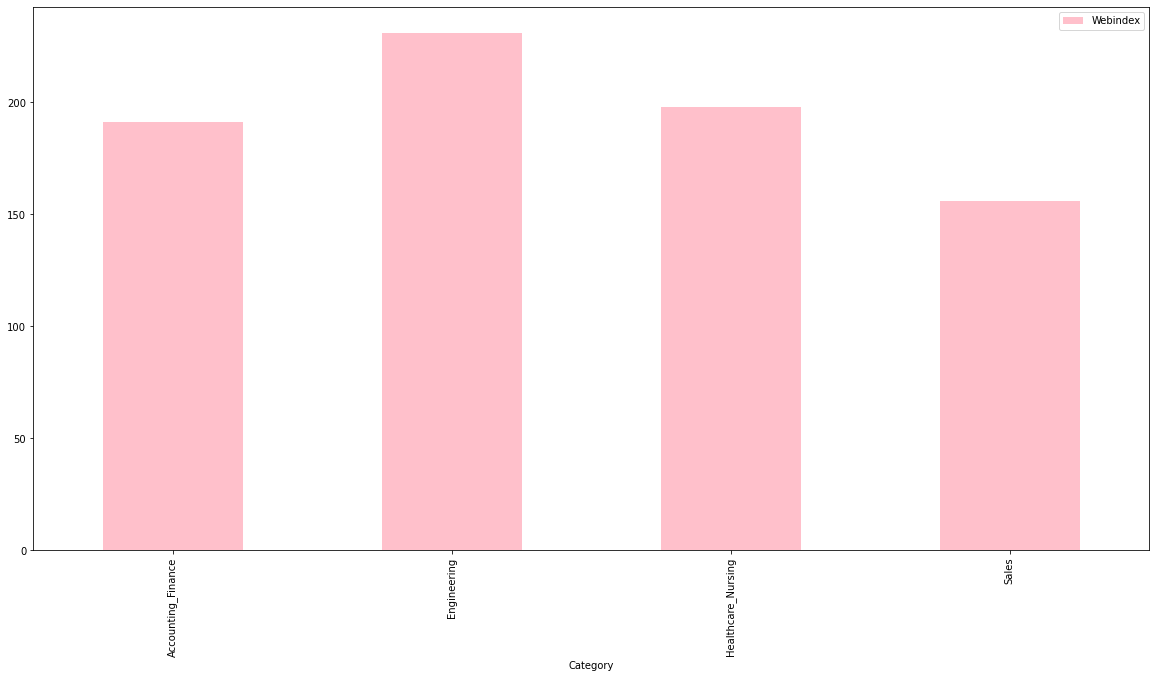

In [7]:
# number of description distribution across 4 categories
job_ad_subset = job_ad[['Webindex','Category']]
stats = job_ad_subset.groupby('Category').count()
print(stats)
stats.plot.bar(ylim=0, color='pink')

### ---------> OBSERVATION: 

The dataset contains relatively balanced labels because the distribution between job description across 4 categories is approximately equal.

#### Constructing the Vocabulary

We construct `vocab` sorted unique vocabulary below by converting the list of tokens to a **set**

In [8]:
# generating the vocabulary

# we put all the tokens in the corpus in a single list
words = list(chain.from_iterable(tk_description))
# set of unique words
vocab = sorted(list(set(words)))
# total number of the vocabulary
len(vocab)

5218

In [9]:
print(f'The number of the category: {len(category)}')
print(f'The number of the description: {len(tk_description)}')
print(f'The number of the unique tokens: {len(vocab)}')

The number of the category: 776
The number of the description: 776
The number of the unique tokens: 5218


### ----------> OBSERVATION:

We checked and know that we have adequate number of category and description

### 7.4 Saving the Webindex

Purpose of easily retrieve the labels of the article in downstream analysis. 

In [10]:
out_file = open("./webindex.txt", 'w') # creates a txt file named 'webindex.txt' to save the id vector of each job ad
for a_ind in range(0, len(tk_description)):
    out_file.write("{}\n".format(webindex[a_ind])) # write the Webindex of each article
out_file.close() # close the file

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Generating Feature Representations</strong></h3>

# Bag of words model

Bag-of-words model: Generate the Count vector representation for each job advertisement description, and save them into a file

In the following, we will demonstrate the usage of the following two classes:
* [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer): It converts a collection of text documents to a matrix of token counts. 
* [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer):
It converts a collection of raw documents to a matrix of TF-IDF features.


So let's say we do binary feature representation but with 3 types of data, the title, the description, and title+description.

# Generating Feature Vectors - Binary, Count, TF-IDF

### Generating Binary Vectors
In this subtask, let's start with generating the binary vector representation for each review.
We need to first import the `CountVectorizer` and initialise it.

In [11]:
# binding the words together for each review
joined_description = [' '.join(review) for review in tk_description]

In [12]:
bVectorizer = CountVectorizer(analyzer = "word",binary = True,vocabulary = vocab) # initialise the CountVectorizer
binary_features = bVectorizer.fit_transform(joined_description)
binary_features.shape

(776, 5218)

In [13]:
# save the binary vector into txt file
bVector_file = "saved_txt_files/BinaryVectors/jobAd_bVector.txt" # file name of the binary vector
write_vectorFile(binary_features,bVector_file) # write the binary vector to file
print(f'Successfully saved {bVector_file} into the directory')

Successfully saved saved_txt_files/BinaryVectors/jobAd_bVector.txt into the directory


### Generating Count Vectors

Each word coresponding to a feature

In [14]:
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab) # initialised the CountVectorizer
count_features = cVectorizer.fit_transform(joined_description)
count_features.shape

(776, 5218)

In [15]:
count_array = count_features.toarray()

# get_feature_names_out return the vocabulary of unique words
df = pd.DataFrame(data=count_array,columns = cVectorizer.get_feature_names_out())
# print out samples
df.sample(3)

,aap,aaron,aat,abb,abenefit,aberdeen,abi,abilities,ability,abreast,...,years,yeovil,yn,york,yorkshire,youmust,young,younger,yrs,zest
128,0,0,0,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0
316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# save count vector into txt file
cVector_file = "saved_txt_files/CountVectors/jobAd_cVector.txt" # file name of the count vector
write_vectorFile(count_features,cVector_file) # write the count vector to file
print(f'Successfully saved {cVector_file} into the directory')

Successfully saved saved_txt_files/CountVectors/jobAd_cVector.txt into the directory


In [18]:
count_features = cVectorizer.fit_transform(joined_description).toarray()

def save_count_vector(count_features, webindex, filename):
    with open(filename, 'w') as f:
        for i in range(len(count_features)):
            f.write('#' + str(webindex[i]) + ',')
            for j in range(len(count_features[i])):
                if count_features[i][j] != 0:
                    f.write(str(j) + ':' + str(count_features[i][j]) + ',')
            f.write('\n')
    f.close()
    print('Count vector representation saved to ' + filename)


save_count_vector(count_features, webindex, 'count_vectors.txt')

Count vector representation saved to count_vectors.txt


### Generating TF-IDF Vectors

TF-IDF also gives larger values for less frequent words and is high when both IDF and TF values are high i.e the word is rare in all the documents combined but frequent in a single document.

In [19]:
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform(joined_description) # generate the tfidf vector representation for all articles
tfidf_features.shape

(776, 5218)

In [20]:
tVector_file = "saved_txt_files/TfidfVectors/jobAd_tVector.txt" # file name of the tfidf vector

write_vectorFile(tfidf_features,tVector_file) # write the tfidf vector to file
print(f'Successfully saved {tVector_file} into the directory')

Successfully saved saved_txt_files/TfidfVectors/jobAd_tVector.txt into the directory


<h3 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Classification with Feature Representation</strong></h3>

We are required to bulid logistic regression models based on different feature vectors (binary, count and tfidf vectors), explore the cases where the model produced false predictions, and evaluate the performance of the model using a 5-fold cross-validation.

In [21]:
# set seed number to ensure the output is reproducible
seed = 3879312

X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_features, category, list(range(0,len(category))),test_size=0.2, random_state=seed)

max_iter = 1000 # this is a relative harder problem and we have to increase the maximum iteration parameter of the logistic regression model.

model = LogisticRegression(random_state=seed,max_iter=max_iter, multi_class='multinomial') # initial a logistic regression model
model.fit(X_train, y_train) # fit the model
model.score(X_test, y_test) # calculated the accuracy score on the test data

0.8589743589743589

Looking at the confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 68.09375, 'Predicted')

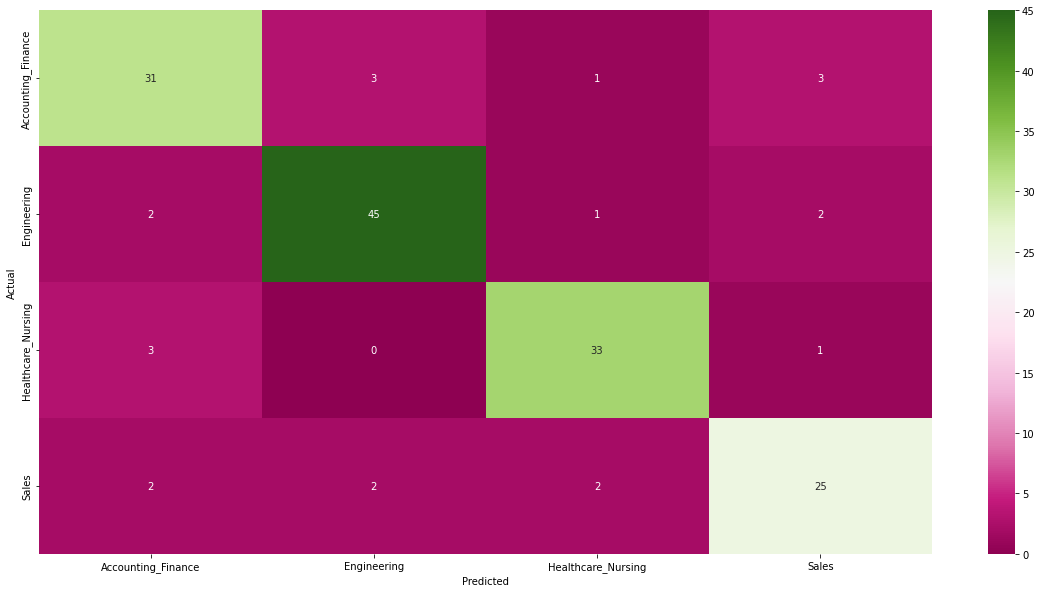

In [23]:
categories = ['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales'] # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories, cmap="PiYG") # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

### ----------> OBSERVATION 

As we can see, most of the category falls into the diagonal line meaning the labels are correctly predicted

### 5-Fold Cross Validation

In [24]:
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) # initialise a 5 fold validation
print(kf)

KFold(n_splits=5, random_state=3879312, shuffle=True)


In [25]:
def evaluate(X_train,X_test,y_train, y_test,seed):
    model = LogisticRegression(random_state=seed,max_iter = 1000)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

num_models = 3
cv_df = pd.DataFrame(columns = ['binary','count','tfidf'],index=range(num_folds)) # creates a dataframe to store the accuracy scores in all the folds

fold = 0
for train_index, test_index in kf.split(list(range(0,len(category)))):
    y_train = [str(category[i]) for i in train_index]
    y_test = [str(category[i]) for i in test_index]

    X_train_binary, X_test_binary = binary_features[train_index], binary_features[test_index]
    cv_df.loc[fold,'binary'] = evaluate(binary_features[train_index],binary_features[test_index],y_train,y_test,seed)

    X_train_count, X_test_count = count_features[train_index], count_features[test_index]
    cv_df.loc[fold,'count'] = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed)

    X_train_tfidf, X_test_tfidf = tfidf_features[train_index], tfidf_features[test_index]
    cv_df.loc[fold,'tfidf'] = evaluate(tfidf_features[train_index],tfidf_features[test_index],y_train,y_test,seed)

    fold +=1

Printing the result of each fold for each vector representation:

In [27]:
cv_df

,binary,count,tfidf
0,0.833333,0.858974,0.858974
1,0.896774,0.890323,0.903226
2,0.890323,0.890323,0.890323
3,0.890323,0.896774,0.916129
4,0.870968,0.883871,0.929032


In [28]:
cv_df.mean()

binary    0.876344
count     0.884053
tfidf     0.899537
dtype: float64

### ------------> OBSERVATION:

We can see 3 features representation works on the model give a good Accuracy score (all are above 80%)


**The next part for embedding model and classification is in the notebook: `Task2_3_2.ipynb`

<br>
<hr>


In [56]:
# import os

# # The .py format of the jupyter notebook
# for fname in os.listdir():
#     if fname.endswith('ipynb'):
#         os.system(f'jupyter nbconvert {fname} --to python')

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Summary</strong></h3>

| **Logistic Models**        | **Accuracy**                                        |
|-----------------------|--------------------------------------------------------|
| binary vector             | 0.876344 |
| count vector                 | 0.884053               |
| tfidf       | 0.899537     |
| FastText with unweighted vector               | 0.3151750972762646    |
| tfidf gensim    | 0.9066147859922179 |
| FastText with tfidf weighted vector gensim   | 0.8715953307392996    |


+ In this work, we need to develop three distinct forms of feature representations for documents, including two FastText embeddings models (one TF-IDF weighted and one unweighted version) and three different types of vectors: Binary, Count, and TF-IDF, and feed them into multiple logistic classification models

+ In contrast to the TF-IDF model, which contains data on the words that are more and less relevant, Bag of Words generates a set of vectors representing the occurrences in the document (description). The Bag of Words vectors is simple to understand. However, in machine learning models, TF-IDF often performs better.

+ By normalizing the words that commonly appear in the collection of documents, the TF-IDF seeks to represent the significance of a word. Recall task1; we did a similar task by removing the top 50 most frequent words based on document frequency. A term appearing in almost every document is not significant for the classification.

+ The Binary, Count, and TF-IDF models completely depend on the frequency of occurrence; it doesn't consider the semantic similarities between words (e.g., equal and identical)


> # Discussion

>> * The computational cost of a Bag-of-Words model is a drawback. If the new sentences use new terms, our vocabulary size and the vectors' length will grow. The vectors would also include a large number of 0s, creating a sparse matrix (which is what we would like to avoid). No details about the sentence structure or the word order within the text are retained by us.

>> * The subsequent analysis will decide the treatment of the text. Should we pre-process it first if we include the "title" information in the classification model? Or should we focus on the word "description" itself? We can select the right downstream analysis job based on the goals of the analytical effort. For instance, we may use the entire document while doing tasks like document categorization and clustering. In contrast, a smaller unit, such as a paragraph or phrase, may be utilized to accomplish tasks like document summaries and information retrieval.

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>References</strong></h3>

+ [1] [Multinomial Logistic Regression With Python](https://machinelearningmastery.com/multinomial-logistic-regression-with-python/)
+ [2] [Quick Introduction to Bag-of-Words (BoW) and TF-IDF for Creating Features from Text](https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/)
+ [3] [FastText paper from Facebook](https://arxiv.org/pdf/1607.04606.pdf)
+ [4] [Gensim’s fastText](https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py)
+ [5] https://thinkinfi.com/fasttext-word-embeddings-python-implementation/
+ [6] [TFIDF with Word Embeddings](https://github.com/ytnvj2/DocumentEmbedding/blob/master/TFIDFwithEmbeddings.ipynb)  
+ [7] [Problem-solving with ML: automatic document classification](https://cloud.google.com/blog/products/ai-machine-learning/problem-solving-with-ml-automatic-document-classification)     
+ [8] [Creating TF-IDF Weighted Word Embeddings](http://dsgeek.com/2018/02/19/tfidf_vectors.html)    
+ [9] [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)